# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

Since we're trying to predict a number, this kind of problem is known as a regression problem.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the Kaggle Bluebook for Bulldozers competition (https://www.kaggle.com/c/bluebook-for-bulldozers/data).

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

We'll work through each step and by the end of the notebook, we'll have a trained machine learning model which predicts the sale price of a bulldozer given different characteristics about it.

## 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data.

Looking at the dataset from Kaggle, you can you it's a time series problem. This means there's a time attribute to dataset.

There are 3 main datasets:

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including "SalePrice" which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

## 3. Evaluation

For this problem, Kaggle has set the evaluation metric to being root mean squared log error (RMSLE) between the actual and predicted auction prices.

For more For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation.

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the Kaggle leaderboard.(https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard)ble.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. 

You can download this file directly from the Kaggle competition page (https://www.kaggle.com/account/login?returnUrl=%2Fcompetitions%2Fbluebook-for-bulldozers) OR you can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing.


With all of this being known, let's get started!

First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

### Importing the data and preparing it for modelling

In [2]:
# Import data analysis tools 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

Now we've got our tools for data analysis ready, we can import the data and start to explore it.

In [3]:
# Import the training and validation set
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False)  # to not to get warning for limited space

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
# Let's find how many missing values are present for each column above
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

As we're trying to predict sale price and we know that our data is a time series...we might want to compare sale dates with sale price.

And because there's so many rows here, and the computer might have a hard time trying to plot all of these data points in one plot...so let's do about 1000 or so.

In [6]:
# If you want to check the column names tehn can do so by checking the Google sheet or as below:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

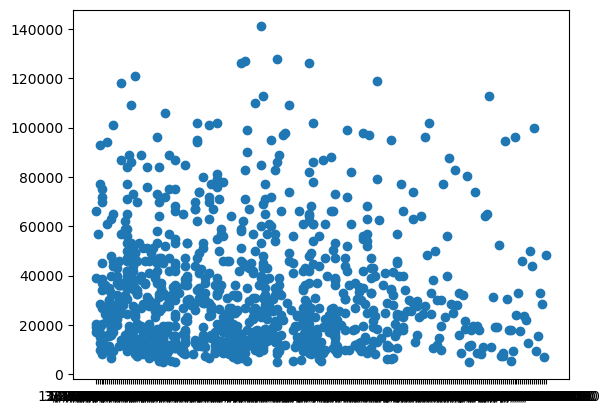

In [7]:
# Lets plot the data

fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [8]:
# The above crowded area on the x-axis are the below 'sale dates' which are not readable
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [9]:
# Note that the 'saledate' above are all "dtype" object
df.saledate.dtype

dtype('O')

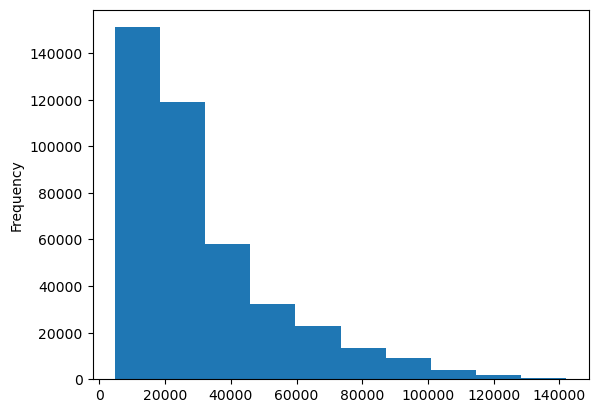

In [10]:
# Let's try to visualize the data by plotting a histogram

df.SalePrice.plot.hist();

We can see from above that most of our sale prices are below 20,000 USD. So the biggest column here are below 30,000 USD, then it just keeps going off and there's less and less...
and not very many that are costing upwards of 100,000 USD.

As these dates aren't really in a format that we want them in. We can see that they're in "dtype" object.

When you're dealing with Time series, you want as much information to be encoded in the dates as possible. This is called **passing dates**.

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible, i. to make sure any date data is the format of a **datetime object** (a Python data type which encodes specific information about dates). More deatils here: https://docs.python.org/3/library/datetime.html. 

We can do that by telling pandas which of our columns has dates in it using the **parse_dates** parameter. This is going to turn whichever column we pass to pass dates into a date time object.

In [11]:
# Import data again....but this time with parse dates

df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,  # to not to get warning for limited space
                parse_dates=["saledate"])

In [12]:
# Now this is going to override our original data frame

df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

So we can see above that Pandas has changed teh formats and also the dtype has changed.

In [13]:
df.saledate.dtype

dtype('<M8[ns]')

In Numpy both "datetime64[ns]" & "dtype('<M8[ns]')" are equivalent.  

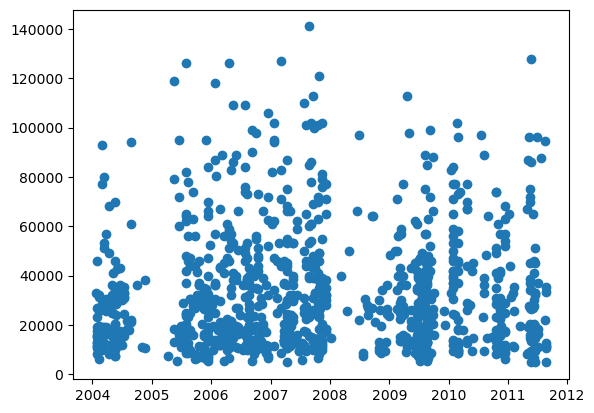

In [14]:
# Now let's re-plot the data again

fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

Now the x-axis looks neater! As our 'saledate' column is now in the form of datetime object, mapplotLib is able to intelligently look at the data type and then plot it accordingly.

What we can derive from the above graph that ---- there weren't much of sales in around 2005 & also around 2008. Then again lot of sales around the middle of between 2009 and 2010. And the highest sale was done just in 2007.

In [15]:
# let's check the data again (1st 5 rows only)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# If we want to see every column & details then we can do 'Transpose' it
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [17]:
# let's check 'SaleDate' column
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

All these dates look all jumbled up, so it would be better if we sort them out....which will help to investigate what's happening with the data.

### Sort DataFrame by saledate

As we're working on a "time series problem" and trying to predict future examples given past examples, it's a good practise to sort our data by date.

In [18]:
# Sort DataFrame in date order

df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [19]:
# Make a copy
df_temp = df.copy()

Now we'll take these dates, use pandas date time, as well as some pandas date time attributes to enrich our data set. This is called as **Feature Engineering**.

Feature Engineering means is either creating a new feature, or make changes in the existing feature/s.

We'll do some feature engineering in our 'Sale Dates'.

### Add datetime parameters for `saledate` column

This is something you might want to do for almost any Time Series project you're working on.

Because we imported the data using `read_csv()` and we asked pandas to parse the dates using `.parase_dates=["saledate"]`, we can now access the different datetime attributes of the `saledate` column.
    
The list of attributes are mentioned here: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DatetimeIndex.html.

In [20]:
# Lets 1st see what some of these attributes does:
df_temp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [21]:
df_temp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [22]:
df_temp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

##### Now let us add a column, i.e add a "date time" parameter for the `saledate` column on the end of our `df_temp`.

In [23]:
# Add datetime parameters for saledate

df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

This will create 5 new columns at the end of 'df_temp'.

This has taken the "sale date" and extracted some of those values and added them as more features on the back end of our "dataframe". But these features won't be listed in our data dictionary, 

In [24]:
# Let's check our new edited data
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [25]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


We could add more of these style of columns, such as, whether it was the start or end of a quarter but these will do for now.

Now we've enriched our DataFrame with date time features, we can remove "saledate".

In [26]:
# Drop original saledate
df_temp.drop("saledate", axis=1, inplace=True)

In [27]:
# Let's check the df_temp now w/o 'saledate'
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [28]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [29]:
# Check the values of different columns (chk the google sheet to decide on which feature to pick)

# lets check the values of sales done in different 'states'
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

This shows that majority of sale has happened in the states of Texas & Florida.

In [30]:
len(df_temp)

412698

We've explored our dataset a little as well as enriched it with some datetime attributes, now let's try to model.

## 5. Modelling

We know the evaluation metric we're heading towards. We could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA.

So we'll start to do some **model-driven EDA**.

Remember, one of the biggest goals of starting any new machine learning project is reducing the time between experiments.

Following the "Scikit-Learn machine learning map" as below, we find a **RandomForestRegressor()** might be a good candidate.

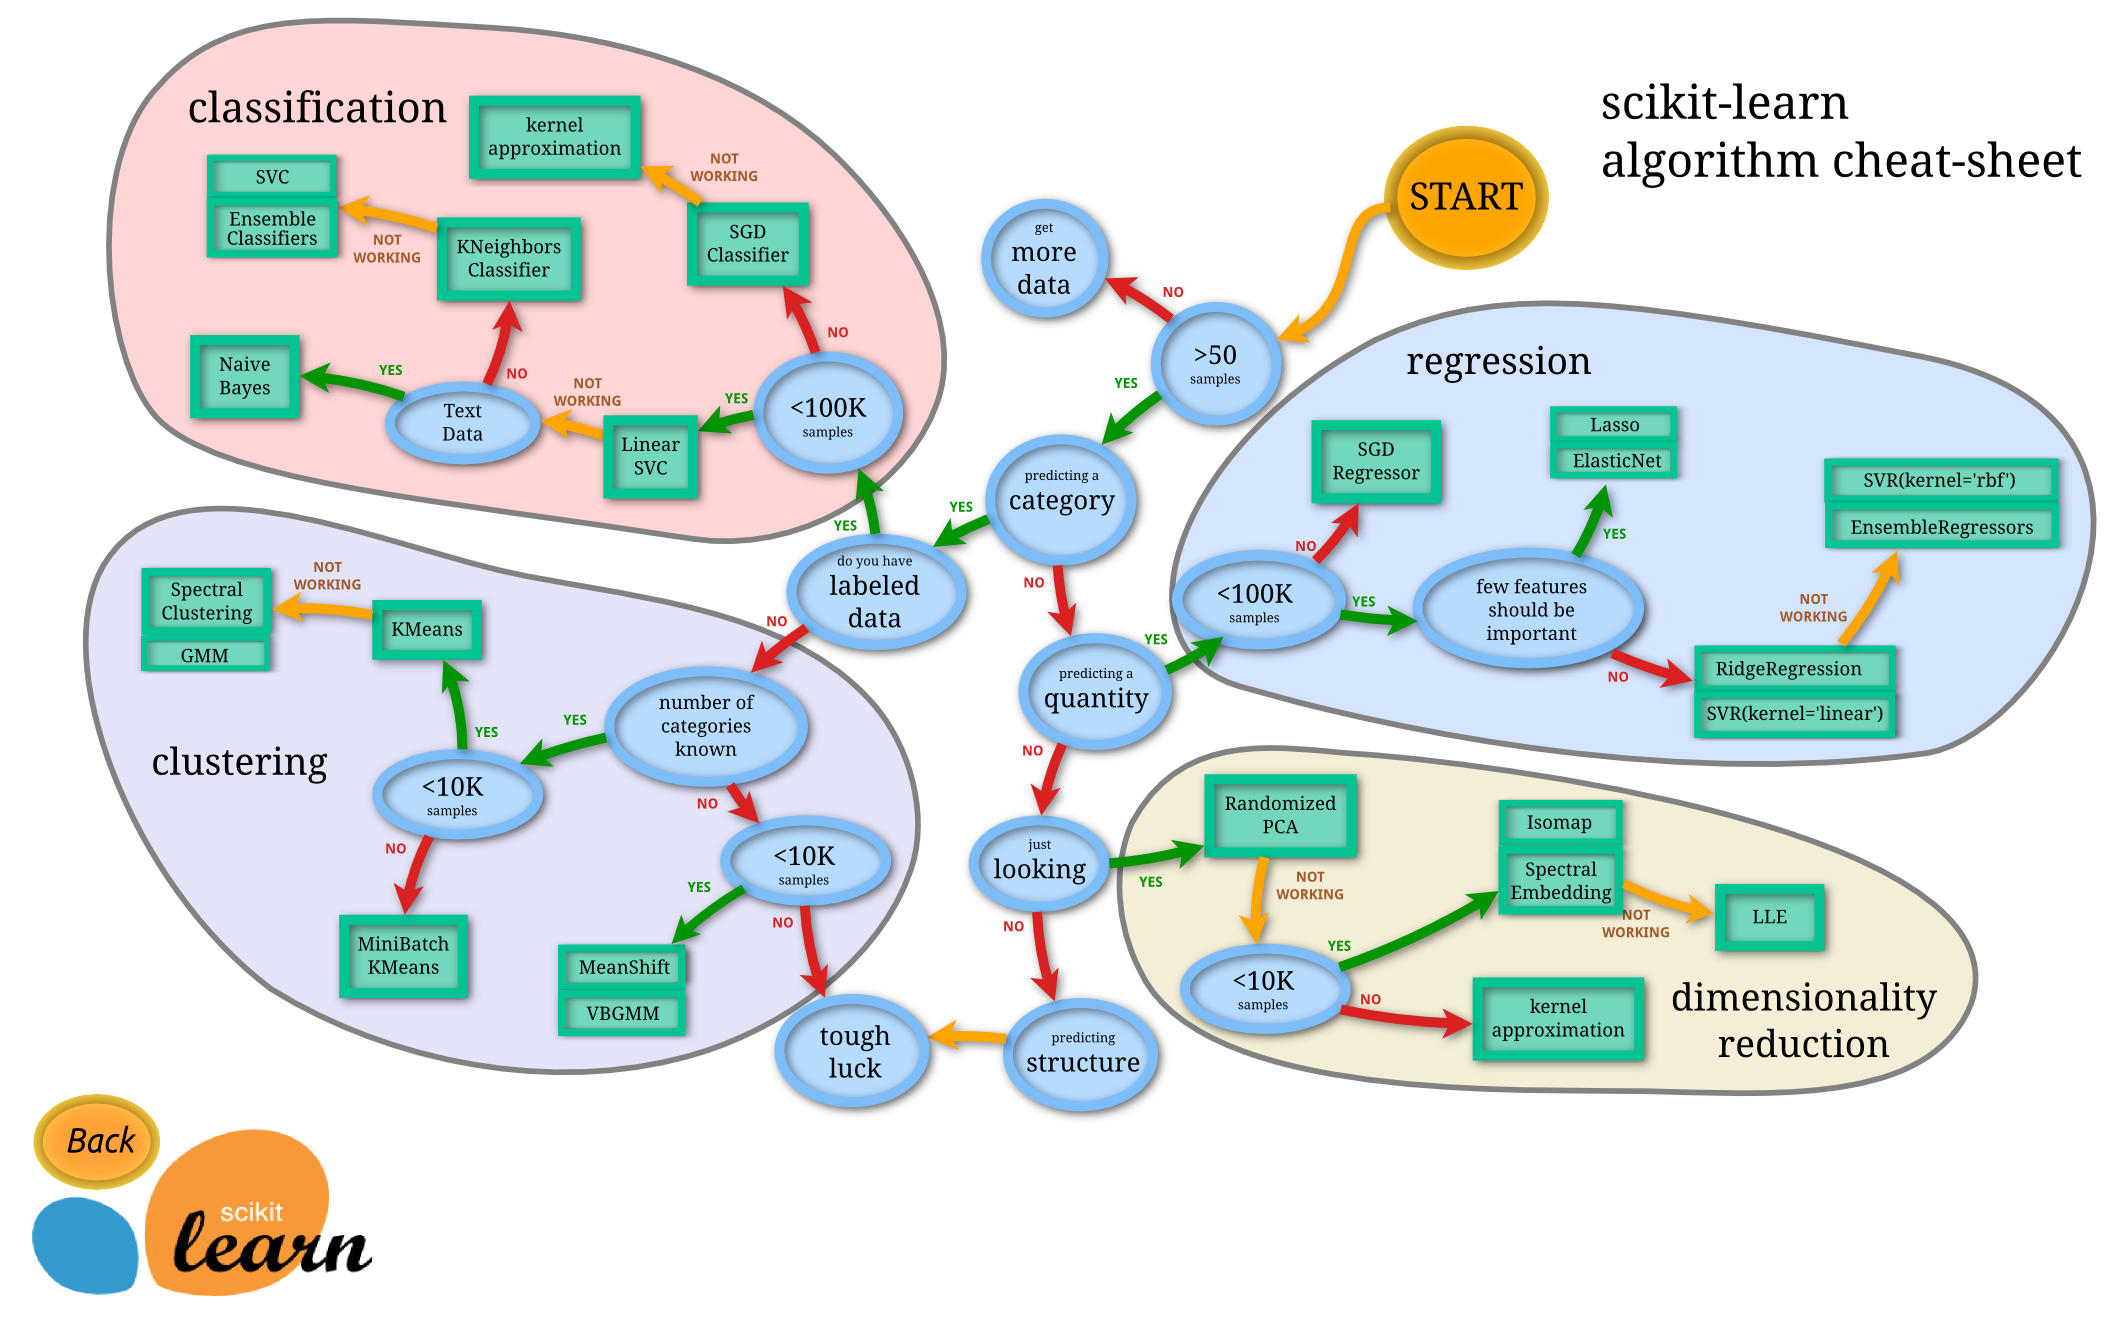

Since we already had some experience with a random forest classifier earlier, so now we might check out its counterpart, the RandomForestRegressor. 

We can check here about the picture above in details: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html.
Click on EnsembleRegressors to be led to RandomForestRegressor.

And also about RandomForestRegressor here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor. 

In [31]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,       # this means its ging to use as many cores as possible
                             random_state=42)       # setting random seed here=42

model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])       
                # Here our X is df_temp.drop("SalePrice", axis=1) & y is df_temp["SalePrice"]

ValueError: could not convert string to float: 'Low'

We got this error b/c all of our data is not in numeric format, AND also we've many missing values.

In [32]:
# Check for missing categories and different datatypes
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [33]:
# Check for missing values
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert string to categories:

One way to turn all of our data into numbers is to convert the columns with the string datatype into a category datatype, i. into Pandas categories. So like the datetime object that we saw when we imported sale date, PANDAS has another data type called category.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.
We can check the different datatypes compatible with pandas here: **(the mentioned link isnt working so didnt put here)**

(**NOTE:** Remember, a lot of machine learning is basically getting some data (like what we got here) and then preparing it to run with an existing ML model that we've chosen from our machine learning map.

So it's about getting some inputs (like the whole bunch of data) we got here and then massaging it into a way that it works with a ML model. And that ML model can find the pattern and give us some outputs like some predictions, some patterns, some labels, something like that. And then we can evaluate how well that's works is what we're doing here. So basically, we're manipulating our inputs to work with our machine learning model.)

In [34]:
# Let's check the data again
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


**Though Daniel has used the code on the columns to find 'strings' & converted all to 'category', BUT I've used another code to find 'object' instead & converted all to 'category'.
B/C in my case the same code wasnt working & showed only 5-6 columns as strings instead of the same number as Daniel's. PLZ Daniel's GITHUB repos for his code.**

In [35]:
# Let's use Pandas API & check "UsageBand" column if its dtype is 'string',for example:

from pandas.api.types import is_string_dtype
pd.api.types.is_object_dtype(df_temp["UsageBand"])

True

In [36]:
df_temp["UsageBand"].dtype

dtype('O')

Since it'll be impossible to check for each column individually like this, so we can create a 'loop' function to do so. If we know which columns contain strings, then we can convert them into some kind of numbers.

In [37]:
# Find the columns which contain strings

for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


`df_temp.items()`, here, treats our dataframe like a dictionary of keys and values. The keys are the column names and the values are whats in the column.

So let's check a little example.

In [38]:
# If you're wondering what df.items() does, let's use a dictionary as an example:

random_dict = {"key1": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
    print(f"this is a key: {key}")
    print(f"this is a value: {value}")

this is a key: key1
this is a value: hello
this is a key: key2
this is a value: world!


Let us now convert all our 'object' dtype data into "category".

In [39]:
# This will turn all of the string values into category values
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()    # 'content.astype("category")' will assign a numerical value to each category
                                                                       # '.as_ordered()' will arrange them in an ordered manner
                                                                    # 'cat' is for 'category'

In [40]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [41]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

As we can't pass strings to a machine learning model, so we need to convert all of our dataframe to numeric. For that, 1st we converted all non-numeric data into 'category'. 

`content.astype("category")` will assign a numerical value to each category and `.cat.as_ordered()` will arrange them in an ordered manner, for eg. arranged in alpahbetic order in case of 'state' column as above. Though the above data still look like 'strings' but under the hood, pandas is treating these as numbers.

We can check that as below:

In [42]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

So now that all of our data is categorical, we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

In [43]:
# Check missing data...in form of 'ratios'

df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

Okay, so not much missing there, but UsageBand has 80% of missing data, Coupler_System has 89%, and so on...

Before we fill in these missing values, we'll save our modified 'df_temp" into a new CSV file so it can be resued later too.

### Save preprocessed data

In [44]:
# Export current temp dataframe to folder 'bluebook-for-bulldozers'
df_temp.to_csv("bluebook-for-bulldozers/train_temp.csv",
               index=False)    # to avoid any error while reimporting

In [45]:
# Re-import the preprocessed dataframe
df_temp = pd.read_csv("bluebook-for-bulldozers/train_temp.csv",
                      low_memory=False)

In [46]:
# Let's check our data from where we left off...
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [47]:
# Let's check the missing data again...
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill missing values:

#### Filling numerical values first

We'll first find the columns with numeric values where data is missing & then fill it up.

In [48]:
# Let's find the columns with numeric values

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [49]:
# Now let's check for which numeric columns have null values

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():          # 'pd.isnull' detects missing values for an array-like object 
            print(label)

auctioneerID
MachineHoursCurrentMeter


Now that we know which all our columns have missing values...so we're going to fill each column with the "median" of that column.

In [50]:
# Fill numeric rows with the median

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():         # same like before until here
            # Add a binary column which tells if the data was missing or not
            df_temp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_temp[label] = content.fillna(content.median())            

**Why add a binary column indicating whether the data was missing or not?**

We can easily fill all of the missing numeric values in our dataset with the median. However, a numeric value may be missing for a reason. In other words, absence of evidence may be evidence of absence. Adding a binary column which indicates whether the value was missing or not helps to retain this information.

**Also**,The reason why **median is used** to fill in the missing data **insatead of mean** b/c median is more robust than the mean. That means when we've a lot of different values, the 'mean' of different values can be very sensitive to the "outliers".

Let us discuss it thru a demo:

In [51]:
# Demonstrate how median is more robust than mean
# FOR EXAMPLE:

hundreds = np.full((1000,), 100)      # hundreds = 1000 ppl having 100 dollar bills
hundreds_billion = np.append(hundreds, 1000000000)      # adding 1 person with 1billion dollar bill

# Now finding mean & meadian of each and comparing their outputs
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [52]:
hundreds

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10

In [53]:
hundreds_billion

array([       100,        100,        100, ...,        100,        100,
       1000000000])

So we can see that 1 outlier value in 'hundred_billions' have affected the value of 'mean' but not 'median'. Thats b/c the median is more robust to outliers.

Now back to our model.....

In [54]:
# Lets CHECK & PRINT if there is any null numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

The "OUTPUT" for this will be "EMPTY", i.e it prints out NOTHING. It's so b/c we just filled the content, the ones which were missing, with the median.

As we've seen above, only **auctioneerID** & **MachineHoursCurrentMeter** columns were having missing values. Now let us check & see what our binary column did...

First, let us check for "auctioneerID" column, i.e how many were missing before we filled up & how many in total are there now. 

So our binary column should be 'TRUE' for 20,136 examples, because that's how many examples we've filled. And should be 'FALSE' for 392562, for non-missing values. (Total values = 392,562 + 20,136 = 412,698)

In [55]:
# Check to see how many examples were missing 
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

This means that we filled up 20,136 values in the auctioneer ID column with the median of the original auction idea column.

Now lets do the same for "MachineHoursCurrentMeter" column. Similarly, our binary column should be 'TRUE' for 147,504 examples in this case.

In [56]:
# Check to see how many examples were missing 
df_temp.MachineHoursCurrentMeter_is_missing.value_counts()

MachineHoursCurrentMeter_is_missing
True     265194
False    147504
Name: count, dtype: int64

##### Though we've filled up all the numeric missing values, but we've still got some of other columns having missing values as below:

In [57]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

#### Filling and turning categorical variables to numbers

Now that we've filled up all the missing numerical values in our data frame, let's do the same for the rest of the values.

So because we've filled up all of the columns with numeric data, we want to find the columns that aren't numeric data.

In [58]:
# Check for columns which arent numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Now we need to fill in the missing categorical variables and turn them into numbers at the same time.

As earlier on we had seen (just above the title 'save processed data') that when we turned all non-numerical values into 'category', they were assigned a number by the PANDA (eg. was 'state' column).

Let's check that again:

In [59]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

So each state name in "state" column is assigned a numerical value. 

In [60]:
pd.Categorical(df_temp["UsageBand"]).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

Incase of "UsageBand", '-1' shows that as there were many empty values so PANDAS assigned them a code of -1.

But we dont want them to be -ve but 0 or +ve in our dataframe...so we can add '+1' at the end of the aboce code just like below:

In [61]:
pd.Categorical(df_temp["UsageBand"]).codes + 1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

Similary for 'state' we can do the same:

In [62]:
pd.Categorical(df_temp["state"]).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

##### So this way we know when we turn our dataframe numeric into all numbers, all categories that '0' is actually missing value. And all the other categories are just +1 on what their category code is. 

##### So let's fill in the missing categorical variables and turn them into numbers at the same time.

In [63]:
# Turn categorical variables into numbers & fill missing

for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value(just like we did before)
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes + 1

**Let's RECAP what've done above---**
We're turning all of these columns that are non numeric, or having non-numeric values, into categories. If they have a missing value, that row will be assigned **-1**, but then we're adding plus one to the code. So all the missing values are going to be **0** and all of the values that are still there, the categories are going to be some number pertaining to whatever pandas decided that their categories are.

In [64]:
# Let's check what we've done
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


So now we've 103 different columns.

In [65]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


We can see that all our categorical **is_missing** columns that were adjusted have been added on the end. This is b/c of this line of code above: **df_temp[label+"_is_missing"] = pd.isnull(content)**. That is **Add a binary column to indicate whether sample had missing value.**

So this means that for sample zero it had a differential type, it was missing. So if we went back and found that column for sample zero, it would be filled with a value zero instead of just missing.

Now let's check again if there is any more missing values.

In [66]:
# Checking our data again for any more missing values...
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

##### Now all of our data is numeric and our dataframe has no missing values, we should be able to build a machine learning model!

Our goal is to find patterns in the data to predict the sale price.

So we need to drop the 'sale price' column, so that we can build a machine learning model that takes in all of the other columns except for 'sale price' finds the patterns and then tries to predict sale price.

Let's check our data again...

In [67]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [68]:
len(df_temp)

412698

**PUTTING A WRONG CODE BELOW ...BEFORE THE NEXT 2 CODES SO THAT WHEN THE CELL IS RUN AUTOMATICALLY...IT CAN STOP RUNNING THE CODES HERE DUE TO ERROR....AS THOSE CODES TAKE TOO LONG & THE PC HANGS...**

In [69]:
df_tmp

NameError: name 'df_tmp' is not defined

As we've way more data (around 412698 rows) than we had in our other projects...so our ML model will take up more time to find patterns in all 41200+ rows.

Let's reinstantiate our trusty "RandomForestRegressor" b/c we're working on a Regression problem (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Also setting a timer alongwith the rest of the code below so check how much time it takes to intantiate our model. 

B/c our goal as a ML engineer is to do as many experiments as fast as possible,. So this'll help us to figure out what we can we do (will chk later) to reduce the time b/w different experiments.

In [ ]:
# Setting up a little 'timer' magic (it's going to calculate how much time this particular cell takes to run)
%time

# Instantiate model 
model = RandomForestRegressor(n_jobs=-1,   # setting at '-1' b/c this is a very large data set & we want to use all of the computer 
                              random_state=42)    # so our results will be reproducible  

# Fit the model
model.fit(df_temp.drop("SalePrice", axis=1),     # X value
          df_temp["SalePrice"])       # y value

Now we're going to score it on just the exact same data that it was trained on.

In [ ]:
# Score the model 
model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

For a regression algorithm, the default score value here is going to be 'Return the coefficient of determination', which is the R^2 of the prediction.

It's a score that can go up to 1. It's 0 if all your model does is predict the mean of the sale price column, and it can go to -ve infinity if your model is absolute terrible.

Though our score is amlost = 1, but that **doesnt mean** that our 'RandomForestRegressor' has almost found a perfect pattern for predicting the sale price based on other columns in the data frame. 

So **Why is the above metric not reliable?**

It is b/c so far what we've done is--- we've trained a ML model on one data set, we've fitted the model on the data set on some data, and then we've evaluated it on the exact same data, instead of testing our model on a test data set! 

But we after our model's ability to **generalize**- i.e acquire the ability for a ML model to perform well on data it hasn't seen before. The most important concept in ML is whatever we train our model on, we want to make sure we're evaluating it on something else. We need to evaluate our model, not on the data we've trained it on, but we need to evaluate it on the test data.

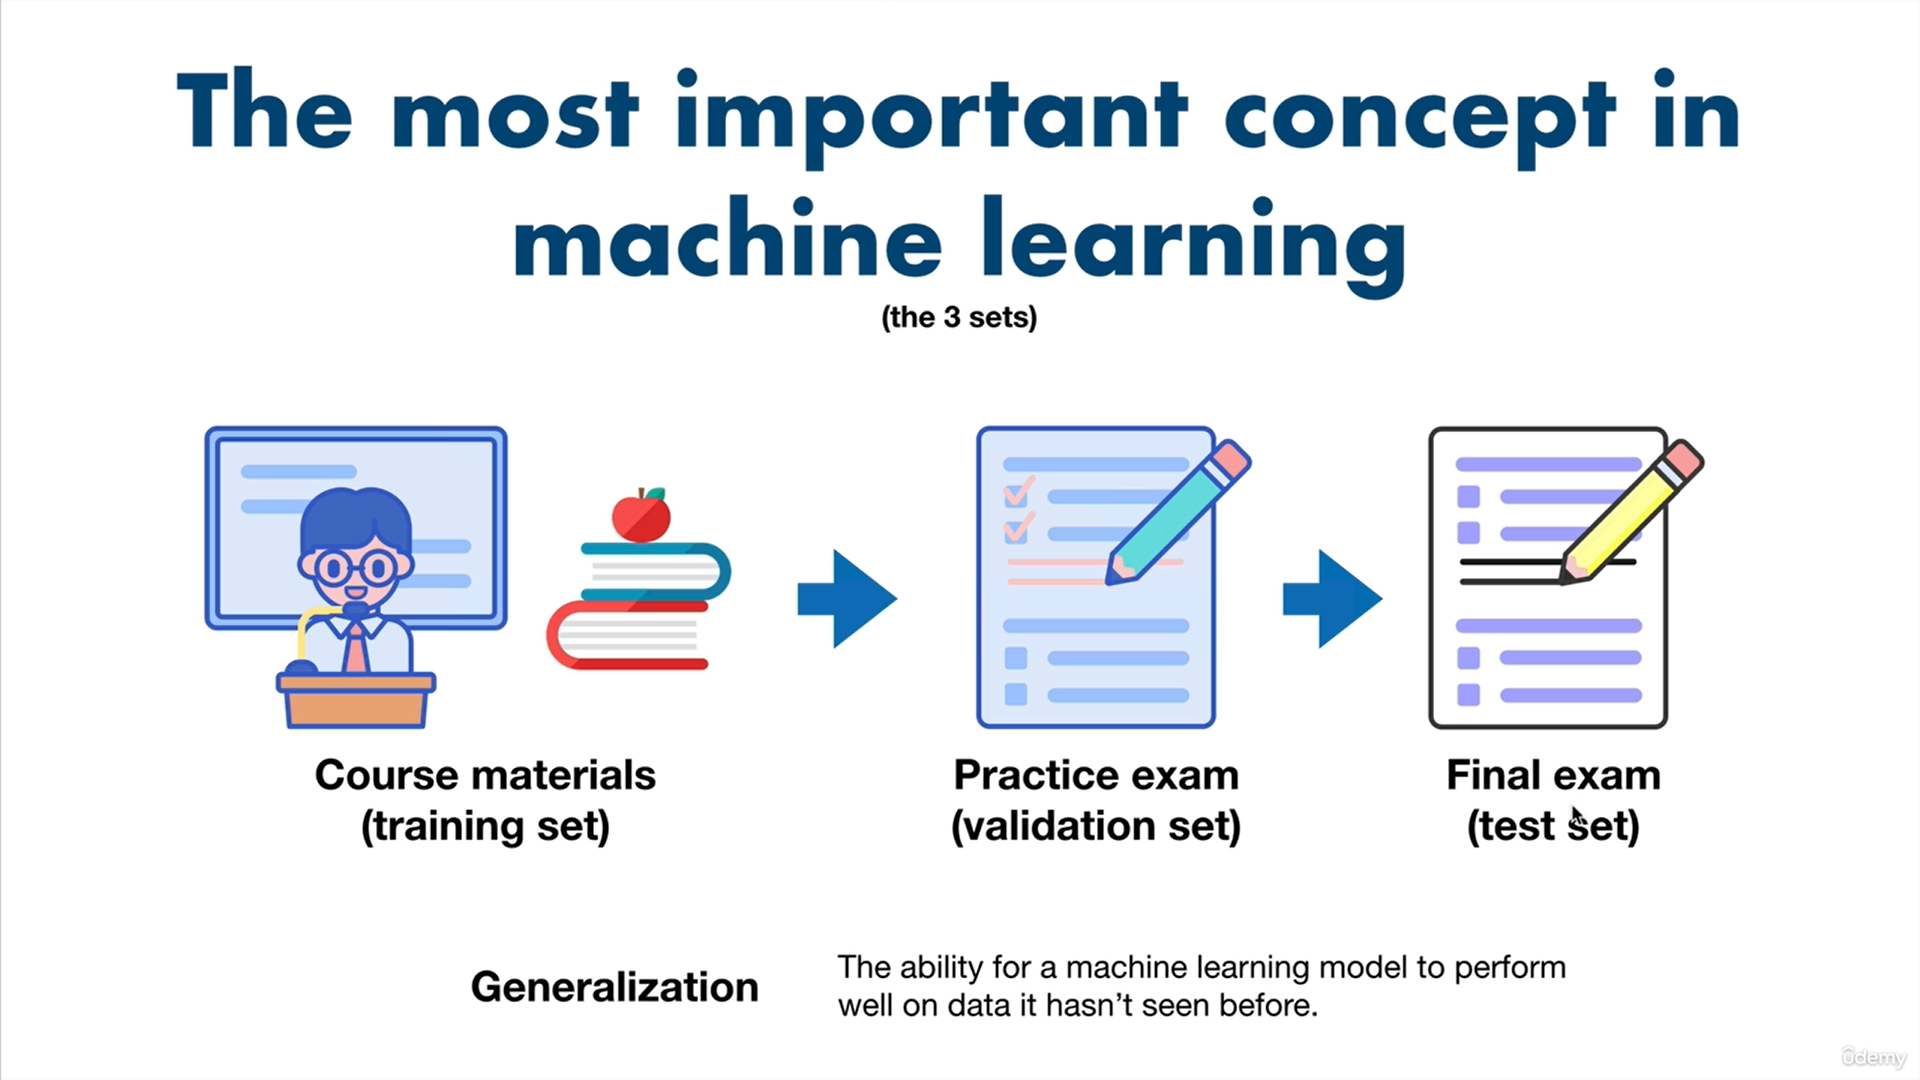

**Note:** In the beginning of this notebook, we've imported one file named 'TrainAndValid' dataset instead of importing them seperately as 'train' dataset & 'valid' dataset, individually. B/c we wanted to create our own validation & training sets with a timeseries dataset instead of someone else creating it. 

Though they were given separetely in the Kaggle file but the same way we may not be always be given by other clients, you're not always going to automatically have your data in train, valid and test sets. These are things you're going to have to create for yourself. Looking at this sale column or looking at the time column, looking at the date column, and figuring out how you can make your own training and validation set.

So that is exactly why we imported them as one set to begin with, so we could practice making our own training and validation sets. 

The key point here is because it's a time series, the training data set has data up to the end of 2011, whereas the validation set has data between January one, 2012 to April 30, 2012. (CHECK THE PROJECT FOLDER)

##### So what we will do to better evaluate our model, we need to split our data up into training and validation set.

### Splitting data into train/validation sets

In [70]:
# Let's check our data again
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


According to the Kaggle data page (https://www.kaggle.com/c/bluebook-for-bulldozers/data or check the project folder), the validation set and test set are split according to dates.

This makes sense since we're working on a time series problem.

E.g. using past events to try and predict future events.

Knowing this, randomly splitting our data into train and test sets using something like `train_test_split()` wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:

* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012 (make predictions on this set) 
* Test = all samples from May 1, 2012 - November 2012

We will use the 'saleYear' to import our data frame. At the moment we'll create our own validation set using the above given info.

In [71]:
df_temp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [72]:
df_temp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

So we can see that there's 11,573 samples in 2012.

Now to split our data into training and validation--every column in saleyear column, that's equal to 2012 will be a validation set for sale year, and every row that's not equal of so year, that's not equal to 2012 will be in the training set.

In [73]:
# Split data into training and validation:

# validation set= every row in df_temp where the sale year column equals 2012
# training set= every row in df_temp where the same year column is not equal to 2012

df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

So now we have a validation set which contains 11,573 rows and a training data set which contains 401,125 rows or samples and their split on date.

In [74]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

In [75]:
# Checking the shapes to compare
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

So our training set is 401,000+ rows with 102 features or columns. Our Y training is 401,000+ rows and then validation is about 11,000+ with the same amount of columns for X. No columns for Y because y is just one column.

In [76]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


In [77]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

Though we evaluated our model using the score function 'Return the coefficient of determination' (which is the R^2 of the prediction) for our scoring model, but in the beginning we had mentioned that ---

According to Kaggle for the Bluebook for Bulldozers competition, the evaluation function(metric) they use is "Root Mean Squared Log Error" **(RMSLE)**. So we'll use RMSLE for our evaluation purpose. 

In other cases we've used Root Mean Square Error **(RMSE)** method for the evaluation of regression problems. But in this case we'll **use RMSLE instead**.
(MORE DETAILS ABOUT RMSLE IS ON THE DANIEL'S GITHUB REPOS & SOME INFO HERE: https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a. GOOGLE MORE !!! )

##### Let's work thru this in code!

### Building an (our own!) evaluation function

We're going to have to create our own evaluation function as its required by the Kaggle competition, and also b/c as we can see in the below picture- for our regression problem here-- We've got metrics R-squared, MAE, MSE & RMSE but no RMSLE. The 'log' component in RMSE is missing.

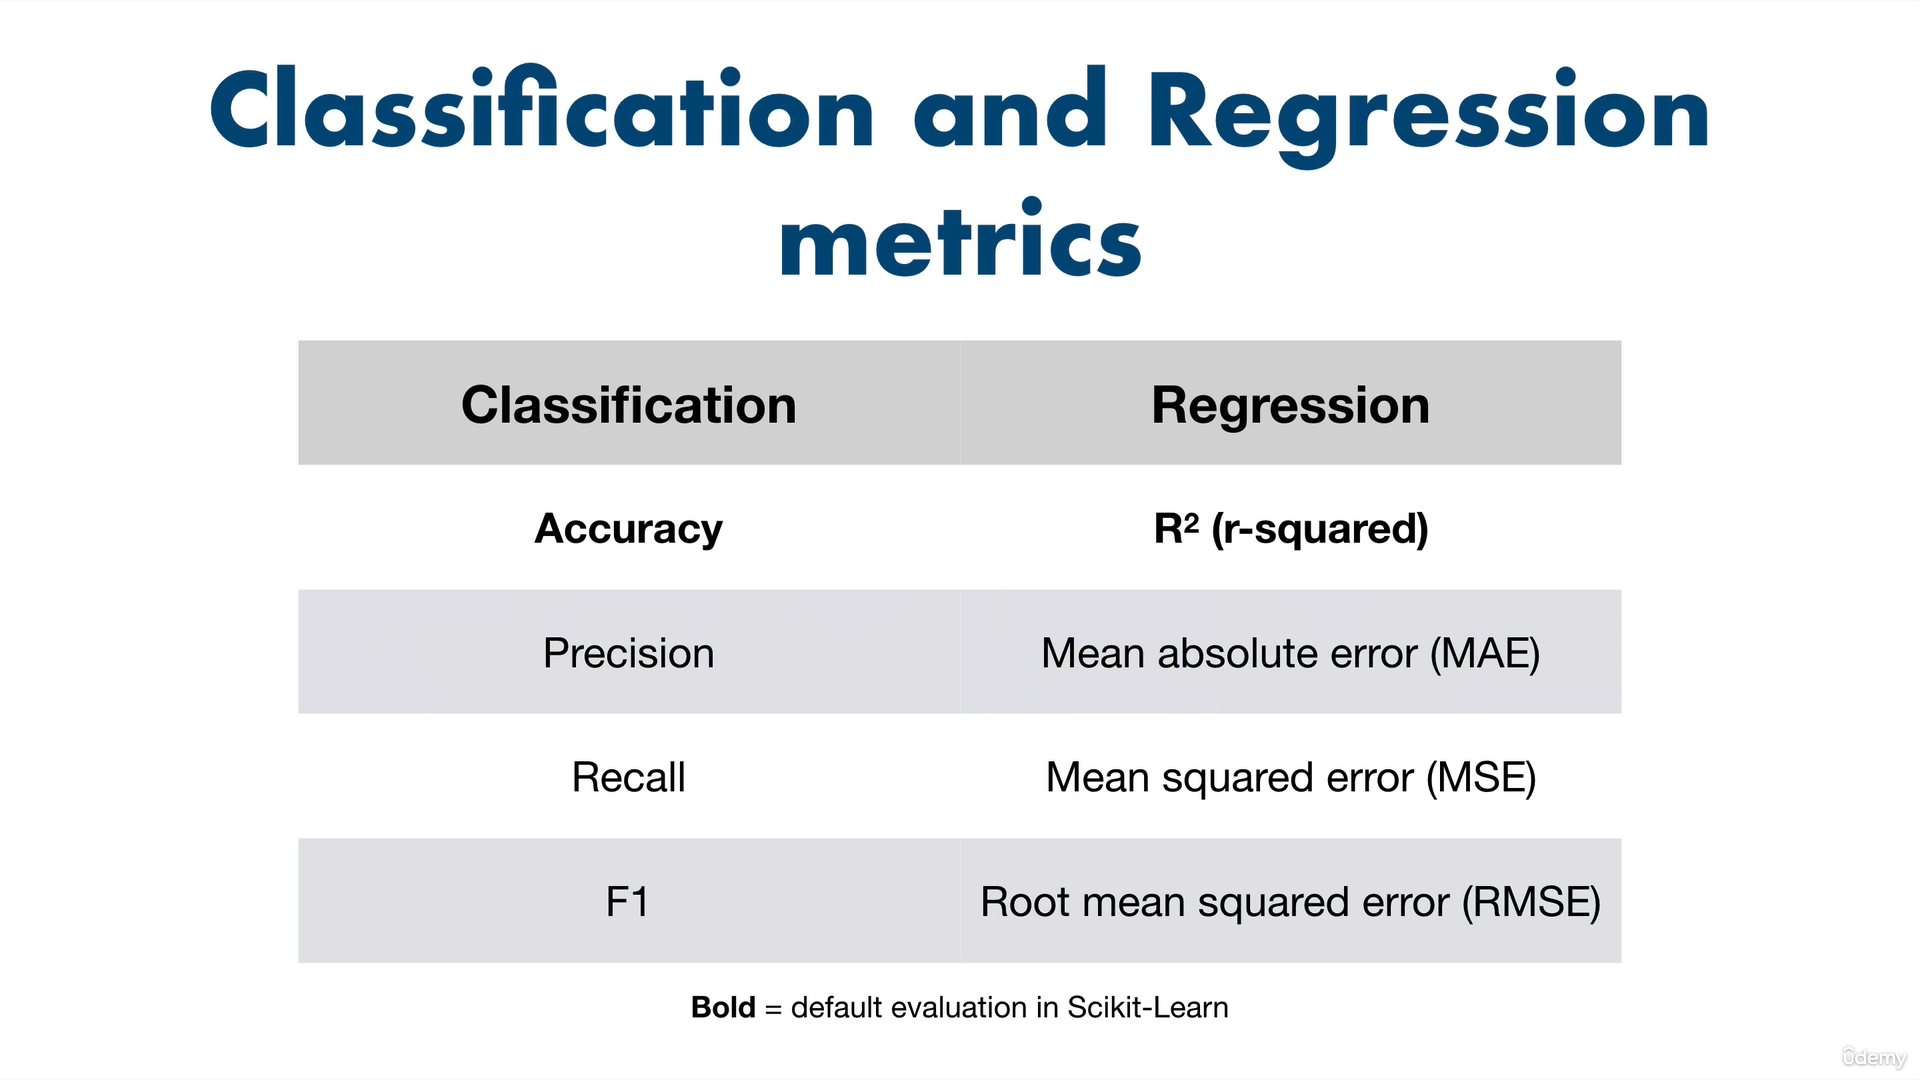

We're going to do is create a **valuation function** because we're going to be running multiple experiments.

We want to be fitting multiple different machine learning models and evaluating them. So we'll build it into a function so we can use this functionality multiple times w/o having to repeat ourselves.

We can do this by taking the **square root of Scikit-Learn's mean_squared_log_error (MSLE)**. MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2 for fun.

**Note:** 
You make predictions on all the examples and then you minus your predictions from your actual values and take the average. That's the 'Mean Absolute Error'. So how much on average is your prediction from the actual sale price. 
But 'Mean Squared Log Error' is more to do with the ratio and most often times with regression problems.

Also we can look at the below pic for better understanding:

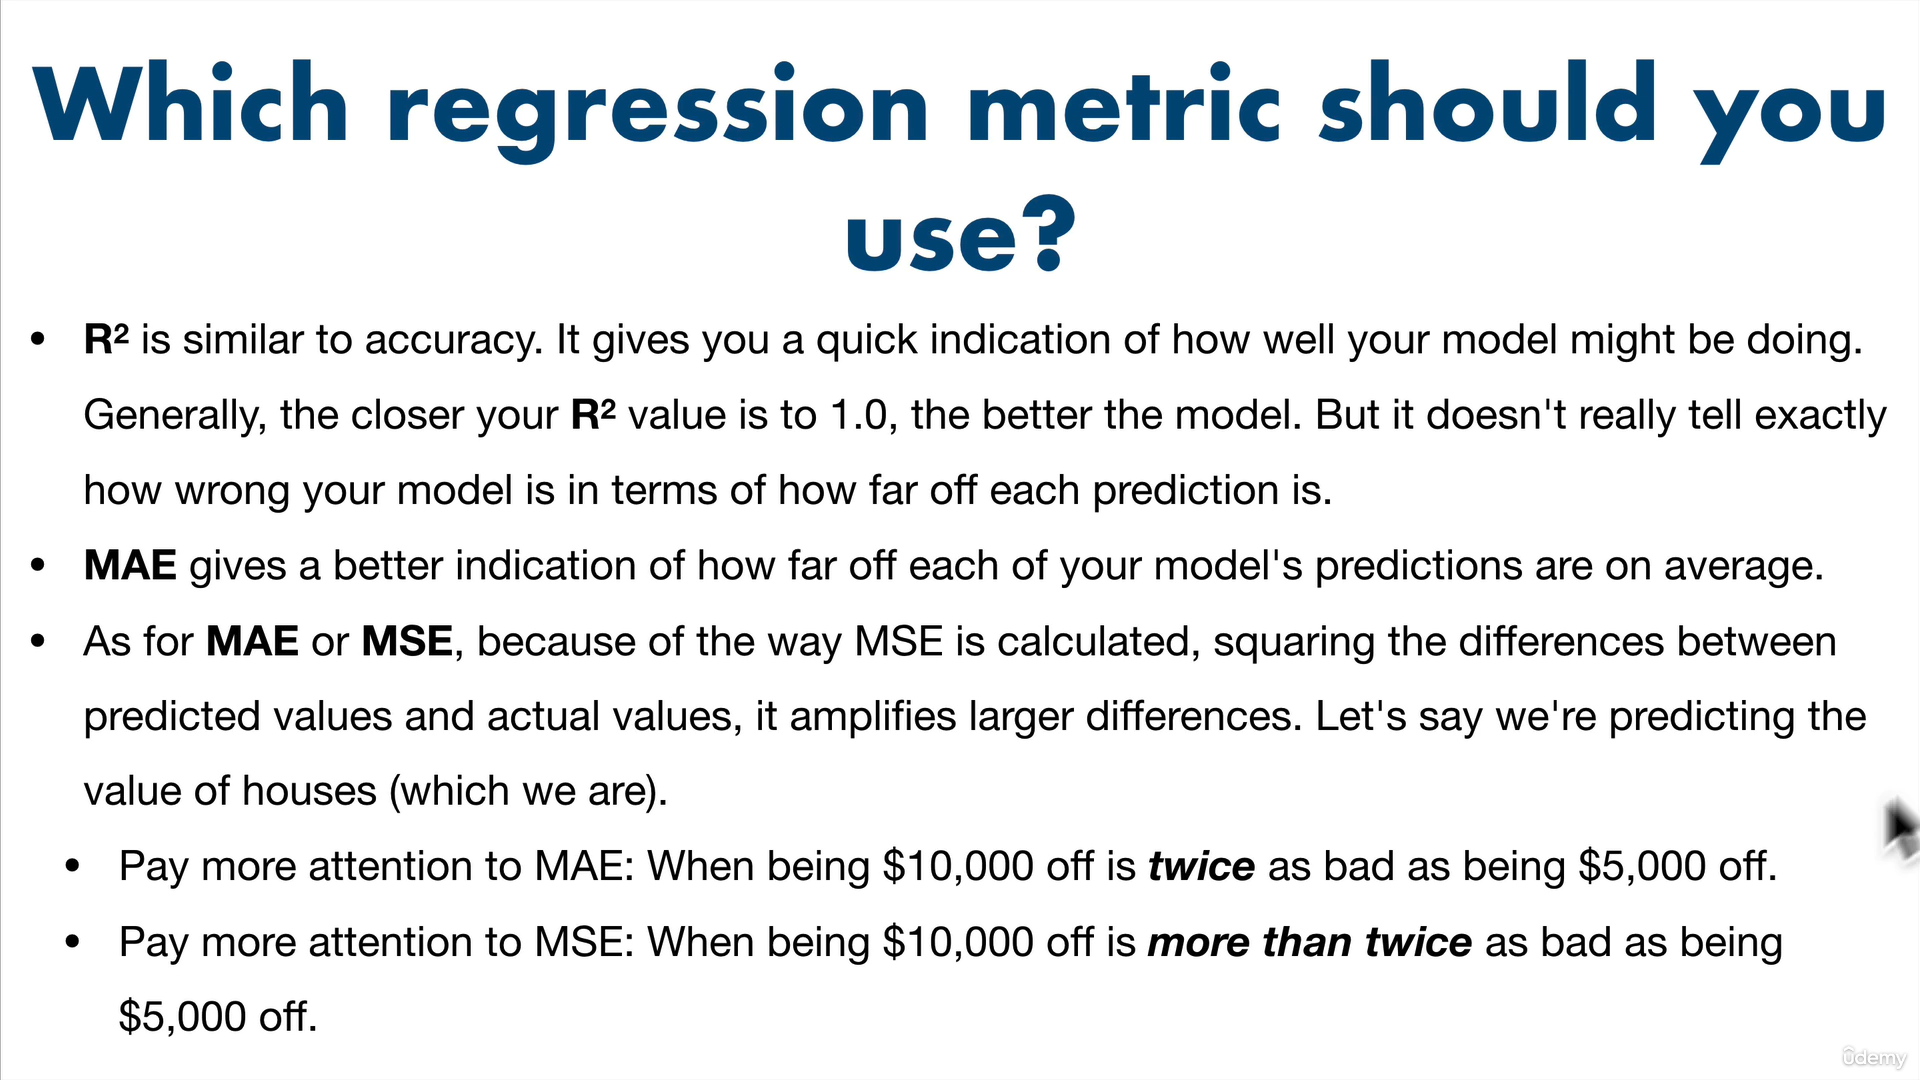

In [78]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    """
    Calculates Root Mean Squared Log Error b/w predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    """
    We'll evaluate how our model did on the training data X train & then we'll evaluate how our model did on the validation data.
    If our model is performing better on the validation data set, that's hinting at us that our model is overfitting.
    """
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

**So what we've done here is that...** We've built an evaluation function in line with what's required for this particular project, and in our case, its root mean squared log error.
Then we've created another little helper function that's going to do a whole bunch of other metrics.

It's going to make some predictions using a model we pass it to, and then it's going to compare those predictions on a whole bunch of different playing fields, like on the mean absolute error on the root mean squared log error and on the coefficient of determination.

It is helpful to have evaluation functions like this so you can quickly do a whole bunch of different things rather than having to retype out this every time we try a new model.

So now that we've got our own custom evaluation functions. We can evaluate how our model is doing. So the next logical step would be to train another one on the training data set and then evaluate it on the validation data set, or just using the function that we've crafted. **But we wont do that as of yet**, as we want to decrease the amount of time it takes us between experiments and if we go back up, we can see that it took too long of time (around 6 mins) to fit a model on all those data. So on 400,000 rows, we don't have enough time to do that again.

##### As retraing an entire model would take far too long to continuing experimenting as fast as we want to.
##### So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

### Testing our model on a subset (to tune the hyperparameters)

In [79]:
# The below code (just like the previous code) takes too long...

# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                                random_state=42)
# model.fit(X_train, y_train)

#....which follows the follwing steps....

# # Retrain a model on training data
# model.fit(X_train, y_train)
# show_scores(model)

In [80]:
len(X_train)

401125

As we can see above that our dataframe is 400,000 rows, and we've seen already that it takes far too long to find patterns in these many rows. But we need to speed up our time between experiments and that's why we'll be testing our model on a subset.

1 way would be to slice our training data set like `model.fit(X_train[:10000], y_train[:10000])`...**But** there is another option...which is **changing the** `max_samples` value in `RandomForestRegressor`.

In [81]:
X_train.shape[0]

401125

Earlier, it took way too longer time to execute as by default--- our `max_samples` was 'none' & `n_estimators` was 100, and if we checked the shape of no. of models then its = 401125. 

So every estimator (n_estimators=100 by default so thats like 100 small models), i.e 100 small models are going to see every single one of 401125 models. So thats around - 401125*100=40112500. And thats a huge number!!

Now if we change the 'max_samples' to 10000, that means every n_estimator (default 100) in our RandomForestRegressor will only see 10000 random samples from our DataFrame instead of the entire 400,000. So the total no. of models will be =10000*100=1000000, which is around 40 times less data to compute!

In [82]:
# Change max samples value in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)   # setting it to '10000', by default it is 'none'

In [83]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time (OUR HYPOTHESIS)
model.fit(X_train, y_train)

CPU times: total: 1min 17s
Wall time: 1min 12s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

So it shows that it took only 1 min or so to execute instead of 15mins or so earlier!! So now let's check how our model does using our own built function, trained on a subset of 10000.

In [84]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

We can see that ----  our 'valid' values for MAE & RMSLE are higher than that of 'trained' values of MAE & RMSLE, respectively. That means we're not overfitting, which is good.

And our R^2 is worst than before (which was 0.987) for both training & valid. But that's alright because we're only training on a subset of 10,000 examples, not all 400,000 like before. So we'd expect these metrics to be worse than if we were to set max samples to be none or train on all of the training data.

##### Now that we've got an idea of how to train our model a bit faster, we can try tuning some different hyper parameters. We'll try to find some ideal hyperparameters that are a bit better than what our 'RandomForestRegressor' defaults with.

### Hyperparameter tuning with RandomizedSearchCV

You can increase n_iter to try more combinations of hyperparameters but in our case, we'll try 20 and see where it gets us.

Remember, we're trying to reduce the amount of time it takes between experiments.

**In RandomizedSearchCV** - we'll create a parameter distribution which kind of looks like a dictionary. RandomizedSearchCV is going to take our model or estimator in Scikit-learn terms & search across this parameter distributions or dictionary for the best hyper parameters for our model.

In [85]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"], # Note:"max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}  # setting at 10000 to reduce the time b/w experiments

# Above we set up a number of diff. values for diff. hyperparameters that RandomizedSearchCV is going to go through, try a certain no. of calculations or combinations of them, and then figure out which ones achieve the best results

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

# So here RandomizedSearchCV is going to pick 2 diff. combinations of parameters from here, assign them to our RandomForestRegressor & then fit it to the training data.

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 27 s
Wall time: 3min 23s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

So this took around 3mins or so to try out 2 different iterations with 5 fold cross-validation (thats total 10 diff. fits) across a bunch of different hyper parameters, it's still far less than our original 15mins, or so, model trial that we did.

##### Now, b/c we have a trained model with RandomizedSearchCV, we can find the best model hyperparameters that RandomizedSearchCV found for us. 

Though we've set our `n_iter=2`, but if you've more computer power then we can even increse it to 100 and find the best parameters from that.

In [86]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 5}

These might not be the best model hyperparameters b/c we've only searched for 2 different combinations, but we're going to work with them for now. 

In [87]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 9810.94446264465,
 'Valid MAE': 11286.474869795597,
 'Training RMSLE': 0.42129584917504487,
 'Valid RMSLE': 0.44017969983177424,
 'Training R^2': 0.6222116775242409,
 'Valid R^2': 0.6317597101458066}

So we can see that the scores has worsend, as we've only tried 2 diff. combinations (n_iter=2). But thats ok as if we try with n_iter=100 (default value), then it would take way longer time to get the best scores.

### Train a model with the best hyperparameters

Above, we found some of the most ideal hybrid parameters for our RandomForestReggressor, by setting `n_iter=2` to reduce the time here. 
                                                                                        But, below are the best hyperparameters were found after 100 iterations of randomized search which can take over 2 hours or so. So it's kind of a set and come back later experiment. And that way, once we've gone through something like this, i.e a use RandomizedSearchCV to find some ideal hyper parameters done done on a subset of like around 10000 samples (as done above b/c otherwise it would take forever) and then retrain a model on the full data set (which is what we're about to do now) with the most ideal hyperparameters 
that were found iRandomizedSearchCVTV.                                                                                                        

As this was done by Daniel already, so we'll just show the ones which were found to be most ideal type of hyperparamete and train on a model with full data set.. 
                                                                                                           
##### Now we'll instantiate a new model with these discovered hyperparameters.

**PUTTING A WRONG CODE BELOW ...BEFORE THE NEXT 2 CODES SO THAT WHEN THE CELL IS RUN AUTOMATICALLY...IT CAN STOP RUNNING THE CODES HERE DUE TO ERROR....AS THOSE CODES TAKE TOO LONG & THE PC HANGS...**

In [88]:
df_tmp

NameError: name 'df_tmp' is not defined

In [89]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,   # the default=100 but it isnt reqd. as it was found from the RandomizedSearchCV that 40 does pretty well too
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None, # not 1000 like before as we want to train on all of the data,i.e it'll train on as many samples as possible 
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 6min 17s
Wall time: 7min 15s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

So that took around 7 mins or so...little more compared to before...the main reason is because an estimate as is 40 rather than 100. So what that means is the random forest is building 40 smaller little models rather than 100.

In [90]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371855,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

And because this is trained on all the data, we should see a significant improvement over the modelthat we trained before.

Let's compare it with the model we trained before. 

In [91]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model)

{'Training MAE': 9810.94446264465,
 'Valid MAE': 11286.474869795598,
 'Training RMSLE': 0.42129584917504487,
 'Valid RMSLE': 0.44017969983177424,
 'Training R^2': 0.6222116775242409,
 'Valid R^2': 0.6317597101458067}

##### The 'Valid RMSLE', is probably the one we want to pay most attention to b/c that is the evaluation metric for this particular Kaggle competition. The evaluation metric can be diff for diff preoblems.

As you can see, with our ideal model, in 7mins or so of training time, it's gone through 400 or so 1000rows and reduced the 'Valid RMSLE' by about 0.8. So that's pretty good.

And if we saw with this, we were already doing well on the competition with our original model (that was 'Valid RMSLE': 0.43997...). So now with our new and improved one, which is our ideal model, we're looking at this here "Valid Root Mean Square Log Error"(RMSLE) = 0.2452...,we're almost in the top 30 on the Kaggle leaderboard. ( https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard )

And we haven't really done an incredible amount of data manipulation. We've turned our data into numbers, we've filled missing value, but we're already getting some incredible results. 

##### So what we'll probably do is leave our ideal model there. 
We could search for longer with randomized search CV up here and find some better high parameters and probably slightly improve our model even more. Maybe push our ranking on the leaderboard to right into the top 25. That'd be pretty cool.

##### But what we might do now is see how we'd make a submission to Kaggle. We can check the rules here- https://www.kaggle.com/c/bluebook-for-bulldozers/overview, and follow accordingly.

So now what we have to do is submit a submission file. As mentioned in the above link, submission file should be formatted as- containing 2 columns with header: sales ID & sale price. 

Now we might import the test data set and formatted in a way so we can use our machine learning model on it and create an example submission in the format that Kaggle is asking of us. As we've got an ideal model, we'll use that to make predictions on the test data set.

### Make predictions on test data:

Now we've got a trained model, it's time to make predictions on the test data.

First let's import the test data.

What we've got at the moment, since this competition has already passed, it contains data from **May 1,2012 to November 2012**. So it's about 6 mths or so after our validation set. 

Our model is trained on data prior to 2011, and its performing okay on the validation set. So now we'll see how we can make predictions on this future 6 mths of data. 
##### What we're doing is trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

In [92]:
# Import the test data
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

In [93]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


This looks familiar except the sale price column is missing...this is b/c that's the column we're trying to predict.

In [94]:
# Let's see how the model goes predicting on the test data
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


This is the similar 'ValueError' we got in the beginning. **The reason why** our machine learning model can't predict on the test data set at the moment is because it's not in the same format as the model was trained on or as the data set the model was trained on. Like it has has some missing values, also some non-numeric values and even the no. of columns are different. So we have to fix it. **Let's create a function to preprocess our data.**

### Preprocessing the test data (i.e  (getting the test dataset in the same format as our training dataset)

Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

**Remember:** Whatever you do to the training data set, you have to do to the test data set.

Let's create a function for doing so (by copying the preprocessing steps we used above).

In [95]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.That is we want to create a function which takes a data frame of some sort.It does a bunch of manipulations on that data frame & then returns that data frame.
    
    """
## Now we're going fill in all the transformations that we did originally to df_temp in here.
    
    # Add datetime parameters for saledate (copied from above in the beginning, but change 'df_temp' to 'df' from the original as we're working with 'df', not 'df_temp')
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code b/c pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

**So...we've a function here that's going to--**
    
    -pre process some sort of dataframe;

    -add some information based on the sale date column;

    -fill numeric rows with the median;

    -and turn the missing categorical data into a 0 value & the rest of the data into then  category code number.

Now we've got a function for preprocessing data, let's preprocess the test dataset into the same format as our training dataset.

In [96]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


So earlier the test data had 52 columns, but now it has 101 columns. 

Let's compare it's shape with taht of train data set.

In [97]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


So we got a different shape to X train. We've got 101 versus 102 columns.

Let's make prediction again.

In [98]:
# Make predcitions on updated test dataset using the best model
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


We've found an error and it's because our test dataset (after preprocessing) has 101 columns where as, our training dataset (`X_train`) has 102 columns (after preprocessing).

Let's find the difference- using the columns attribute and turning them into "python sets". Python sets are a list with only unique values in them.

In [99]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

So this tells us which columns are incorrect. In our case, its 'auctioneerID_is_missing'. That means our df_test has no column as 'auctioneerID_is_missing'. So that means, when we imported our test data frame according to our function, it didn't have any 'auctioneerID' values that are missing. 

So we can manually update a column on our df_test data frame to have all false values for 'auctioneerID_is_missing' b/c our df_test dataframe has no 
columnnamedm 'auctioneerID_is_missing' as all of the 'auctioneerID' values were filled in df_tes.  Thus we'e vts manually ad ut sf_ test to ave ''auctioneerID_is_missing' columnD

In [100]:
# Manually adjust df_test to have 'auctioneerID_is_missing' column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


So now we've 102 columns and also column 'auctioneerID_is_missing'.

Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

BUT......There's one more step we have to do before we can make predictions on the test data.

And that's to line up the columns (the features) in our test dataset to match the columns in our training dataset.

As in, the order of the columnns in the training dataset, should match the order of the columns in our test dataset.

> **Note:** As of Scikit-Learn 1.2, the order of columns that were fit on should match the order of columns that are predicted on.

In [101]:
# Match column order from X_train to df_test (to predict on columns, they should be in the same order they were fit on)
df_test = df_test[X_train.columns]

Now the test dataset column names and column order matches the training dataset, we should be able to make predictions on it using our trained model.

In [102]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [103]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

We've made some predictions but they're not in the same format Kaggle is asking for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation. These all are array of predicted sale prices.

Kaggle wants the data to be submitted  in a certain format. Namely, a DataFrame containing the `SalesID` and the predicted `SalePrice` of the bulldozer. 

Let's format predictions into the same format Kaggle is after.

In [104]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

In [105]:
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


We could submit this to the compettion competition. But at the moment, this well, this cable competition is no longer running.

But it's an example of how we could get our data in a format that it's asking for and then to export that in a format of CSV.

In [106]:
# Export prediction data
df_preds.to_csv("bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature Importance

Since we've built a model which is able to make predictions. So one might be curious of "what parts of the data" led to these predictions. 
This is wer*e** feature imporan*c**e comes i.n

##### Feature importance seeks to figure out which different attributes of the data were most important when it comes to predictingthee** targetvariableb** (SalePrie)e.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall e price? pr

We'll use `feature_importances_` attribute find o  out which features were most important for our `RandomForestRegressor` of the ML mo.ce?

In [108]:
# Find feature importance of our best model
ideal_model.feature_importances_     

# 'feature_importances_' returns the feature importances (the higher,the more important the feature)

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [110]:
len(ideal_model.feature_importances_)

102

So this has 102 values.

In [109]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


Wherelese, X_train has same no. of columns. So that means we're getting a value for every feature on X_train.

Like, salesID would map to 3.39445533e-02, machineID would map to 1.81148281e-02, and etc...

Let's visualise the feature importance by creating a 'Helper function' and plotting it.

In [115]:
#Creating a 'Helper function' for plotting feature importance

def plot_features(columns, importances, n=20):     # taking top 20 values insatead of 102 !!
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    # this whole process of using a bracket with 2 dots inside is called 'Chaining".
    # that means it's just going to do these 3 panda steps of pd.DataFrame, sort_values & reset_index in one hit.

    # Plot the dataframe 
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()    # this helps to put the most valuable feature at the top

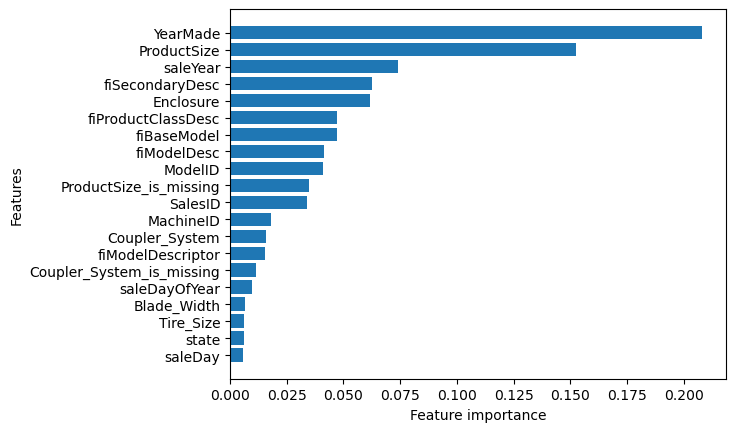

In [116]:
plot_features(X_train.columns, ideal_model.feature_importances_)

So what we can infer from teh aboive figure is that considering the top 20 different features, hat the year that the bulldozer was made is the most important feature based on the ideal model and then the product size.

Futher more, this information here might influence how you go about collecting data in the future on your bulldozer sale. **OR** if this info make sense if a model is using these features to derive its predictions. So you might put a bit more effort into the values here that are contributing most to predicting the sale price of a bulldozer in the future.

##### Check Daniel's GitHub repo for the same note for more 'Challenges' on 'Experimentation' to be done on own ! Also to answer few more questions.